In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

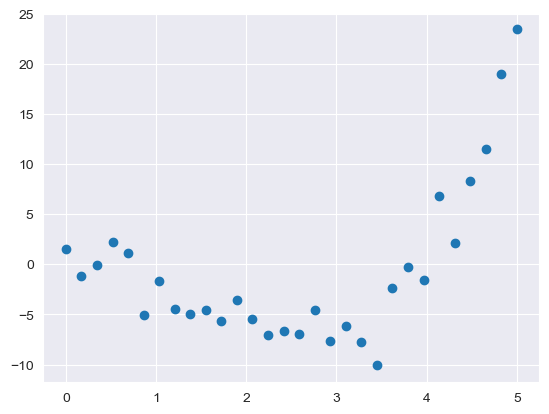

In [119]:
np.random.seed(0)
x = np.linspace(0,5,30)
y = x - 3.3 * (x ** 2) + 0.8 * (x ** 3) + np.random.normal(-2,2,30)
plt.scatter(x, y)

In [120]:
X= x[:,np.newaxis]
'''
Newaxis pour transformer l'array 1D en vecteur colonne // [np.newaxis,:] vecteur ligne // [:,np.newaxis] vecteur colonne
'''
X = PolynomialFeatures(degree=10, include_bias=False).fit_transform(X)
X.shape #check les dimensions de X

(30, 10)

In [121]:
#Train set et Test set avec train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1) #argument test_size : 20% du set en test, 80% en train

Coef R2 train :  0.9524239537971236
Coef R2 test : 0.3956547395185639


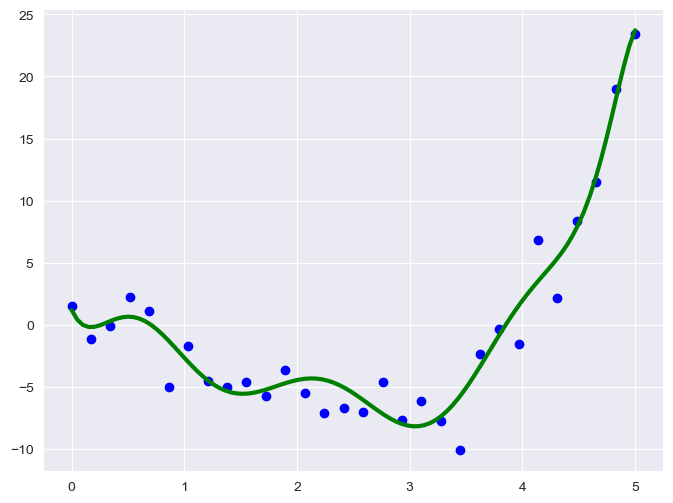

In [122]:
model1= LinearRegression()
model1.fit(x_train, y_train)
print('Coef R2 train : ', model1.score(x_train,y_train))
print('Coef R2 test :', model1.score(x_test,y_test))
plt.figure(figsize=(8,6))
plt.scatter(x,y, c='blue')
a= np.linspace(0,5,100).reshape((100,1))
A= PolynomialFeatures(degree=10, include_bias=False).fit_transform(a)
plt.plot(a, model1.predict(A), c ='green', lw=3)

Coef R2 train :  0.9389996118807901
Coef R2 test : 0.8392617331488832


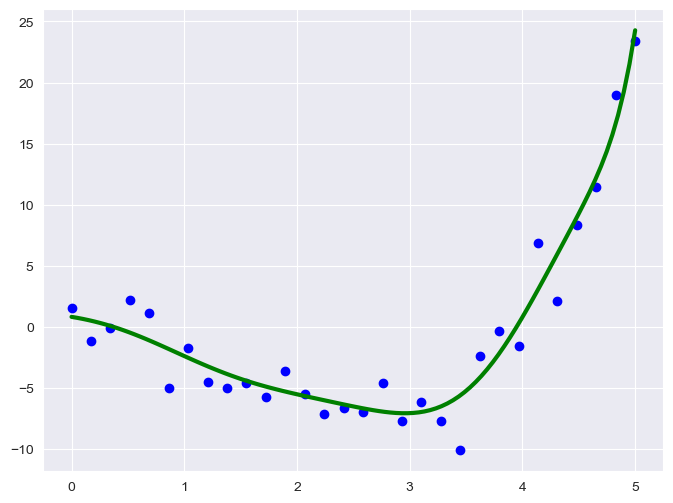

In [123]:
#Jouer avec alpha
model2= Ridge(alpha=0.5, random_state=0) #alpha trop petit = overfit, trop grand = underfit
model2.fit(x_train, y_train)
print('Coef R2 train : ', model2.score(x_train,y_train))
print('Coef R2 test :', model2.score(x_test,y_test))
plt.figure(figsize=(8,6))
plt.scatter(x,y, c='blue')
a= np.linspace(0,5,100).reshape((100,1))
A= PolynomialFeatures(degree=10, include_bias=False).fit_transform(a)
plt.plot(a, model2.predict(A), c ='green', lw=3)